In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("220928_MGU18_Pivots_Q-Status_September_Daten.xlsx")

In [4]:
pd.set_option('display.max_row', 147)
pd.set_option('display.max_column', 147)

In [5]:
df.head()

,ID,FAHRGESTELLNR_7,PRODUKTIONSDATUM_MONATSGENAU,GUTSCHRIFTSDATUM_MONATSGENAU,BAUREIHE_FZG_KLASSEN,PRODUKTIONSDATUM,ZULASSUNGSDATUM,REPARATURDATUM,BEFUND06_AND_BEZ,KOMMENTARSAMMLUNG_GW,PQM_NR,FEHLERTYP_CLUSTER,ROOTCAUSE_CLUSTER,TECH_PROBLEMBILD_CLUSTER,VERURSACHER_CLUSTER,PROBLEMBESCHREIBUNG_KUNDE,PROBLEMBESCHREIBUNG_TECHNISCH,LAENDERAUSFUEHRUNG,ORDERLAND,TEILETAUSCH_GENERELL,RELEVANTER_FEHLERSPEICHER,I_STUFE_VOR_REP,MnP_GWK,MnP_REAL,MODELL_REF,PRODUKTLINIE1,REPARATURLAND,HAENDLERNUMMER_REPARATUR,REPARATURDATUM_MONATSGENAU,F2_DATUM_MONATSGENAU,VFC_Bez,BEMERKUNG,ISTUFE_WERK,BEARBEITUNGS_STATUS,HAENDLER_REPARATUR,BIT_ANDERER_VERURSACHER,GW_KULANZSTUFE,ANDERER_VERURSACHER_CLUSTER,GUTSCHRIFTSDATUM_WOCHENGENAU,FAHRGESTELLNR_17,TPK,Modul,AG_GWK_FALLKOSTEN,BefCluster,Modul_lang
0,609466114,FM69570,2022-03,2022-03,G26,02.03.2022,19.03.2022,22.03.2022,651256 HEADUNIT BASIS (OHNE NAVIGATION),"BLUETOOTH NOT WORKING, CARRIED OUT HEAD UNIT R...",kein PQM,BT / ACP / AA,unzureichende Informationen,Bluetooth: Funktionsstörung/Performance,Nicht zuzuordnen,BLUETOOTH NOT WORKING,Funktion nach Reset der HU i.O.,EUR,GB,N,keine,S18A-22-03-520,1,0,NaN,LK,GB,10055,2022-03,2022-03,Headunit Basis / Headunit Mid kpl.,MGU Alpine,S18A-22-03-520,Abgeschlossen,Sytner Harold WoodA12 Colchester Road Romford...,nein,1-3,undefined,2022-12,WBA12AW080FM69570,E - 03 - CoCo,CD,"73,43",CD - Headunit,CD02
1,609493183,9L68629,2022-03,2022-04,G05,05.03.2022,30.03.2022,02.04.2022,659014 STRAßENKARTE NAVIGATION,FCORRECT OPERATION OF NAVI DC D6590SWT00000999...,kein PQM,Anwendungsfehler,Händlerverschulden - PDI nicht korrekt durchge...,MGU: Übergabedurchsicht fehlerhaft,Händler,C/S NAVIGATION SYSYTEM INOP,The navigation system was not activated.\nWrit...,USA,US,N,NaN,S18A-21-11-560,2,0,NaN,LG,US,41518,2022-04,2022-03,Navigationskarte,MGU Harman,S18A-21-11-560,Abgeschlossen,BMW of Freeport100 Cleveland Avenue Freeport ...,nein,1-3,undefined,2022-14,5UXCR6C07N9L68629,E - 03 - CoCo,CD,"105,62",CD - Headunit,CD02
2,609493198,9L92622,2022-03,2022-04,G05,24.03.2022,30.03.2022,07.04.2022,651258 HEADUNIT HIGH HU-H (NAVI PROFESSIONAL),B 65 07 21CLIENT STATES THAT THE VEHICLES BLUE...,kein PQM,BT / ACP / AA,Endgeräte: Bluetooth issue,Bluetooth: Verbindungsabbruch/Probleme,Nicht zuzuordnen,CLIENT STATES THAT THE VEHICLES BLUETOOTH CONN...,GOOGLE Pixel 3 XL,USA,US,N,keine,S18A-21-11-564,2,0,NaN,LG,US,51008,2022-04,2022-03,Headunit High,MGU Harman,S18A-21-11-564,Abgeschlossen,South Shore BMW1040 Hingham Street Rockland ...,ja,1-3,EXT - Endgeräte,2022-14,5UXCR6C03N9L92622,E - 03 - CoCo,CD,"141,57",CD - Headunit,CD02
3,609511344,FM72028,2022-03,2022-04,G20,22.03.2022,31.03.2022,11.04.2022,651258 HEADUNIT HIGH HU-H (NAVI PROFESSIONAL),Keine Kommentare vorhanden,kein PQM,Nicht zuzuordnen,unzureichende Informationen,MGU: Reset sporadisch,Lieferant,Resets,NaN,EUR,DE,N,0xB7F8F9 - Reset: Watchdog im I/O-Controller l...,S18A-22-03-520,2,0,NaN,LK,DE,607,2022-04,2022-03,Headunit High,MGU Harman,S18A-22-03-520,Abgeschlossen,Autohaus Fink GmbH & Co. KGGünther-Scharowsky-...,nein,1-3,undefined,2022-15,WBA5U91020FM72028,E - 03 - CoCo,CD,"106,40",CD - Headunit,CD02
4,609512632,CK38848,2022-03,2022-04,F90,23.03.2022,08.04.2022,11.04.2022,841126 BLUETOOTH TELEFONFUNKTION,Keine Kommentare vorhanden,kein PQM,BT / ACP / AA,unzureichende Informationen,Bluetooth: Funktionsstörung/Performance,Nicht zuzuordnen,NaN,"6P1 Austattung , ohne Kunden BA nicht zurorden...",EUR,DE,N,keine,S15A-22-03-520,2,0,NaN,ZS,DE,23532,2022-04,2022-03,Telefon / Bluetooth SG.,MGU HARMAN,S15A-22-03-520,Abgeschlossen,Autohaus Hoyer GmbHKräher Weg 33 Nienburg 31...,nein,1-3,undefined,2022-15,WBS81CH020CK38848,E - 03 - CoCo,CD,"81,76",CD - Telefonie,CD02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1091 non-null   int64  
 1   FAHRGESTELLNR_7                1091 non-null   object 
 2   PRODUKTIONSDATUM_MONATSGENAU   1091 non-null   object 
 3   GUTSCHRIFTSDATUM_MONATSGENAU   1091 non-null   object 
 4   BAUREIHE_FZG_KLASSEN           1091 non-null   object 
 5   PRODUKTIONSDATUM               1091 non-null   object 
 6   ZULASSUNGSDATUM                1091 non-null   object 
 7   REPARATURDATUM                 1091 non-null   object 
 8   BEFUND06_AND_BEZ               1091 non-null   object 
 9   KOMMENTARSAMMLUNG_GW           1091 non-null   object 
 10  PQM_NR                         1091 non-null   object 
 11  FEHLERTYP_CLUSTER              1091 non-null   object 
 12  ROOTCAUSE_CLUSTER              1091 non-null   o

In [8]:
df.shape

(1091, 45)

<AxesSubplot:>

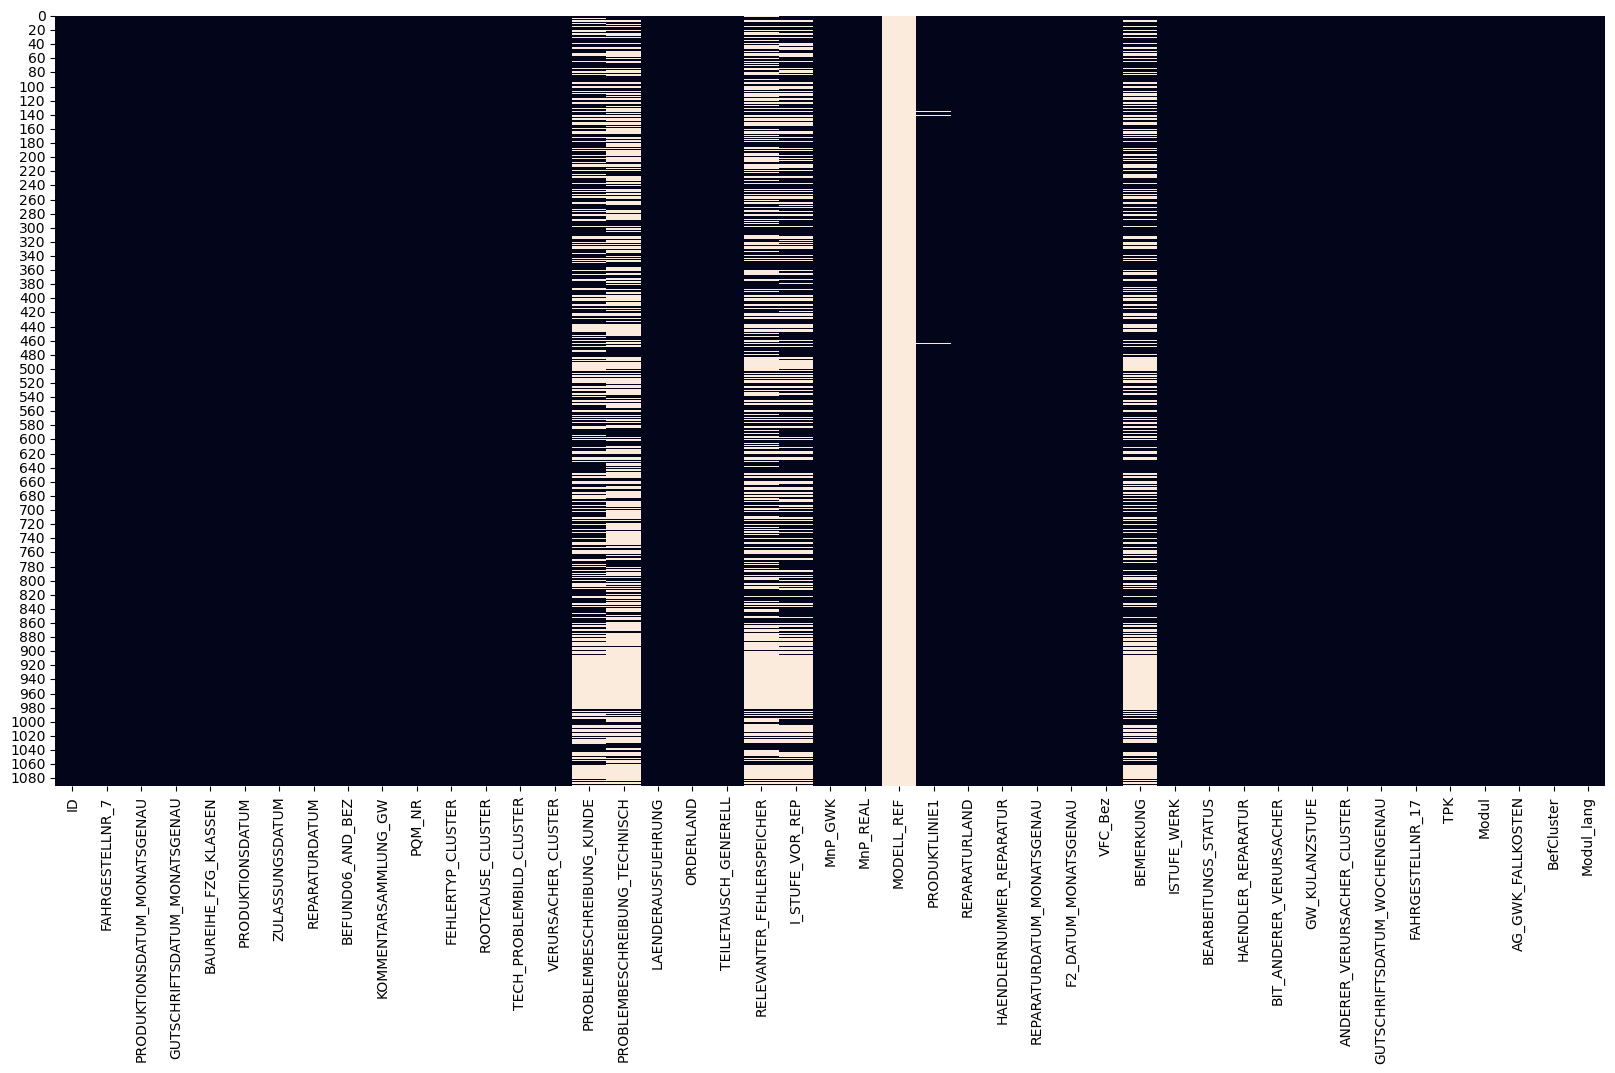

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [10]:
 df["TECH_PROBLEMBILD_CLUSTER"].value_counts()

undefined                                                                  425
MGU: Audio not available                                                   151
ohne relevante Hinweise (zB rel FSP)                                        95
Anderer Verursacher: in Übergabe                                            50
MGU: Reset (System Crash)                                                   44
Apple Car Play: No Function                                                 31
MGU: Übergabedurchsicht fehlerhaft                                          27
Bluetooth: Device Pairing                                                   27
MGU: Blackscreen                                                            24
Apple Car Play: Funktionsstörung                                            21
Bluetooth: Funktionsstörung/Performance                                     20
Bluetooth: Verbindungsabbruch/Probleme                                      20
MGU: nicht erreichbar in Diagnose                   

In [11]:
fillt_1 = (df["TECH_PROBLEMBILD_CLUSTER"] != "undefined")

In [12]:
df_1 = df[fillt_1]

In [13]:
df_1.shape

(666, 45)

In [14]:
df_1["TECH_PROBLEMBILD_CLUSTER"].value_counts()

MGU: Audio not available                                                   151
ohne relevante Hinweise (zB rel FSP)                                        95
Anderer Verursacher: in Übergabe                                            50
MGU: Reset (System Crash)                                                   44
Apple Car Play: No Function                                                 31
Bluetooth: Device Pairing                                                   27
MGU: Übergabedurchsicht fehlerhaft                                          27
MGU: Blackscreen                                                            24
Apple Car Play: Funktionsstörung                                            21
Bluetooth: Funktionsstörung/Performance                                     20
Bluetooth: Verbindungsabbruch/Probleme                                      20
MGU: nicht erreichbar in Diagnose                                           17
MGU: Reset sporadisch                               

In [15]:
df_5 = df_1["TECH_PROBLEMBILD_CLUSTER"].value_counts()

In [16]:
df_Serie_1 = df_5[0:10]
df_Serie_1

MGU: Audio not available                   151
ohne relevante Hinweise (zB rel FSP)        95
Anderer Verursacher: in Übergabe            50
MGU: Reset (System Crash)                   44
Apple Car Play: No Function                 31
Bluetooth: Device Pairing                   27
MGU: Übergabedurchsicht fehlerhaft          27
MGU: Blackscreen                            24
Apple Car Play: Funktionsstörung            21
Bluetooth: Funktionsstörung/Performance     20
Name: TECH_PROBLEMBILD_CLUSTER, dtype: int64

In [17]:
df_Serie_2 = df_5[10:]
df_Serie_2
type(df_Serie_2)

pandas.core.series.Series

In [18]:
df_200 = df_Serie_2.sum()
type(df_200)

numpy.int64

In [19]:
df_Serie_1["andere "] = df_200
df_Serie_1

MGU: Audio not available                   151
ohne relevante Hinweise (zB rel FSP)        95
Anderer Verursacher: in Übergabe            50
MGU: Reset (System Crash)                   44
Apple Car Play: No Function                 31
Bluetooth: Device Pairing                   27
MGU: Übergabedurchsicht fehlerhaft          27
MGU: Blackscreen                            24
Apple Car Play: Funktionsstörung            21
Bluetooth: Funktionsstörung/Performance     20
andere                                     176
Name: TECH_PROBLEMBILD_CLUSTER, dtype: int64

In [27]:
df_Serie_1.values

array([151,  95,  50,  44,  31,  27,  27,  24,  21,  20, 176], dtype=int64)

In [26]:
df_Serie_1.index

Index(['MGU: Audio not available', 'ohne relevante Hinweise (zB rel FSP)',
       'Anderer Verursacher: in Übergabe', 'MGU: Reset (System Crash)',
       'Apple Car Play: No Function', 'Bluetooth: Device Pairing',
       'MGU: Übergabedurchsicht fehlerhaft', 'MGU: Blackscreen',
       'Apple Car Play: Funktionsstörung',
       'Bluetooth: Funktionsstörung/Performance', 'andere '],
      dtype='object')

In [28]:
df_1[df_Serie_1]

KeyError: "None of [Int64Index([151, 95, 50, 44, 31, 27, 27, 24, 21, 20, 176], dtype='int64')] are in the [columns]"

In [22]:
df_Serie_2.replace( to_replace = df_Serie_2.keys() , value = "andere" )

Bluetooth: Verbindungsabbruch/Probleme                                     20
MGU: nicht erreichbar in Diagnose                                          17
MGU: Reset sporadisch                                                      15
MGU: Enabling Codes not available - Unexpected error 922                   14
MGU: Navigation Positionierung                                             11
MGU: Navigation Routenführung                                               7
Bluetooth: No Audio                                                         7
Android Auto: Funktionsstörung                                              5
RAM: Keine Audioausgabe                                                     5
MGU: Ethernetverbindung                                                     5
MGU: Speech fehlfunktion                                                    4
MGU: Navigation Zieleingabe fehlerhaft                                      3
Apple Car Play: Keine Verbindung möglich                        